# Iris-nikicus

In [267]:
import pandas as pd
import numpy as np
from enum import Enum

import adaline_sgd
import dr

from importlib import reload
reload(adaline_gd)
reload(adaline_sgd)
reload(dr)

class Attr: # attributes enum for clarity
    SEPALS = 0
    PETAL = 2
    KIND = 4

df = pd.read_csv("iris_modified.data", header=None)

y = df.iloc[:150, Attr.KIND].values
y = np.where(y == 'Iris-nikicus', -1, 1)
X = df.iloc[:150, [Attr.SEPALS, Attr.PETAL]].values

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

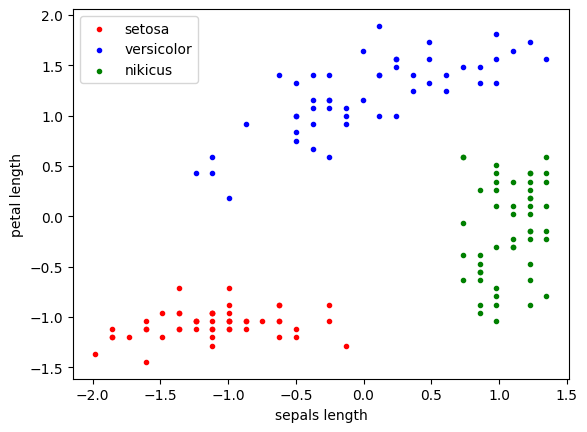

In [268]:
import matplotlib.pyplot as plt

plt.scatter(X_std[:50, 0], X_std[:50, 1],
    color = "red", marker=".", label="setosa",
)
plt.scatter(X_std[50:100, 0], X_std[50:100, 1],
    color = "blue", marker=".", label="versicolor",
)
plt.scatter(X_std[100:150, 0], X_std[100:150, 1],
    color = "green", marker=".", label="nikicus",
)
plt.xlabel("sepals length")
plt.ylabel("petal length")
plt.legend(loc="upper left")
plt.show()

/home/trofchik/Documents/python/flowers_ml/dr.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  #     plt.scatter(


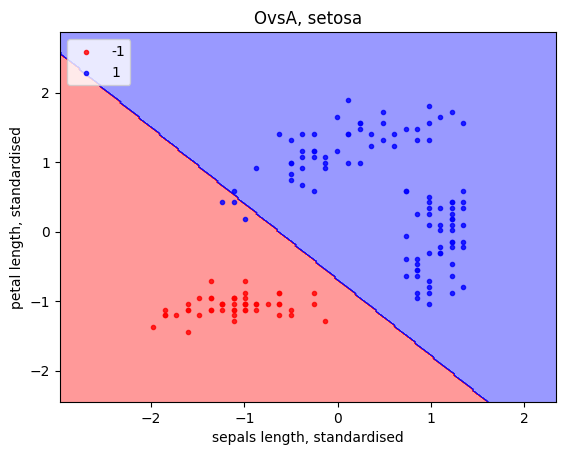

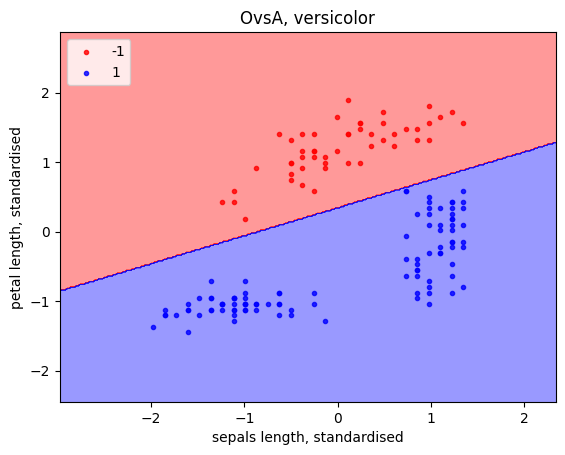

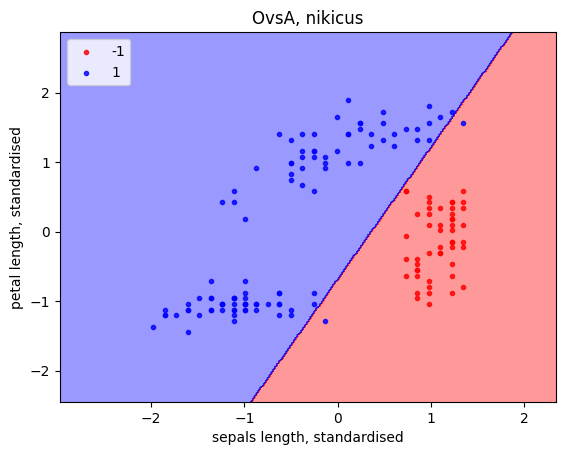

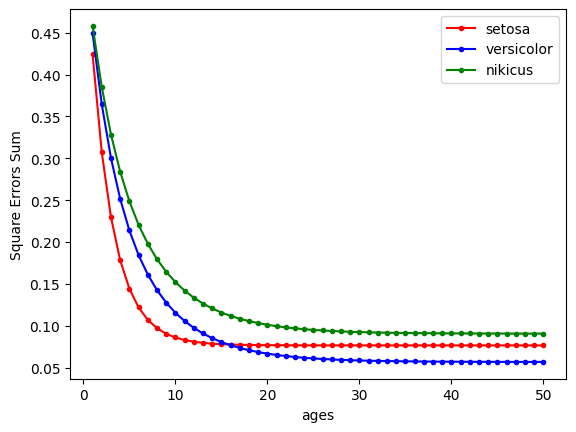

In [269]:
from adaline_sgd import AdalineSGD

y = df.iloc[:150, Attr.KIND].values
y_set = np.where(y == "Iris-setosa", -1, 1)
y_ver = np.where(y == "Iris-versicolor", -1, 1)
y_nik = np.where(y == "Iris-nikicus", -1, 1)

X_std = df.iloc[:, [Attr.SEPALS, Attr.PETAL]].values
X_std[:, 0] = (X_std[:, 0] - X_std[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X_std[:, 1] - X_std[:, 1].mean()) / X[:, 1].std()

# teaching using method one vs all
ETA = 0.001
N_ITER = 50

ada_set = AdalineSGD(eta=ETA, n_iter=N_ITER, random_state=228)
ada_set.fit(X_std, y_set)
dr.plot_decision_regions(X_std, y_set, ada_set)
plt.title("OvsA, setosa")
plt.xlabel("sepals length, standardised")
plt.ylabel("petal length, standardised")
plt.legend(loc="upper left")
plt.show()

ada_ver = AdalineSGD(eta=ETA, n_iter=N_ITER, random_state=322)
ada_ver.fit(X_std, y_ver)
dr.plot_decision_regions(X_std, y_ver, ada_ver)
plt.title("OvsA, versicolor")
plt.xlabel("sepals length, standardised")
plt.ylabel("petal length, standardised")
plt.legend(loc="upper left")
plt.show()

ada_nik = AdalineSGD(eta=ETA, n_iter=N_ITER, random_state=1337)
ada_nik.fit(X_std, y_nik)
dr.plot_decision_regions(X_std, y_nik, ada_nik)
plt.title("OvsA, nikicus")
plt.xlabel("sepals length, standardised")
plt.ylabel("petal length, standardised")
plt.legend(loc="upper left")
plt.show()

plt.plot(range(1, len(ada_set.cost_) + 1), ada_set.cost_, marker=".", color="red", label="setosa")
plt.plot(range(1, len(ada_ver.cost_) + 1), ada_ver.cost_, marker=".", color="blue", label="versicolor")
plt.plot(range(1, len(ada_nik.cost_) + 1), ada_nik.cost_, marker=".", color="green", label="nikicus")
plt.legend(loc="upper right")
plt.xlabel("ages")
plt.ylabel("Square Errors Sum")
plt.show()


In [270]:
def classify3(X_std, y, clf0, clf1, clf2):
    pred0 = clf0.predict(X_std)
    pred1 = clf1.predict(X_std)
    pred2 = clf2.predict(X_std)

    for t in zip(pred0, pred1, pred2):
        print(t)


df_proof = pd.read_csv("iris_proof.data", header=None)
py = df_proof.iloc[:, Attr.KIND].valuesx
py = np.where(py == 'Iris-nikicus', -1, 1)
P = df_proof.iloc[:, [Attr.SEPALS, Attr.PETAL]].values
P_std = np.copy(P)
P_std[:, 0] = (P[:, 0] - X[:, 0].mean()) / X[:, 0].std()
P_std[:, 1] = (P[:, 1] - X[:, 1].mean()) / X[:, 1].std()

classify3(P_std, py, ada_set, ada_ver, ada_nik)

    
        

(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
(1, 1, -1)
